In [1]:
import numpy as np
import matplotlib.pyplot as plt

There are four different models under consideration: scalar (S), psuedoscalar (P), vector (V), and psuedo (axial) vector (A):

* $\mathcal{L}_S = ie \epsilon \phi \bar{\psi} \psi$
* $\mathcal{L}_P = ie \epsilon \phi \bar{\psi}\gamma_5 \psi$
* $\mathcal{L}_V = ie \epsilon A_{\mu} \bar{\psi}\gamma^\mu \psi$
* $\mathcal{L}_V = ie \epsilon A_{\mu} \bar{\psi}\gamma_5 \gamma^\mu \psi$

where $e$ is the electric charge and $\epsilon \equiv g/e$ is the relative charge of the new physics.

In [2]:

# ##### PARAMETERS #####

m_mu = 0.105
m_e = 0.000511
m_tau = 1.776
m_p = 0.937
E_0 = 1500
theta_max = 1e-3

alpha_EM = 1.0/137

cases = ["Scalar", "Pseudoscalar", "Vector", "Axial Vector"]
colors = ["red", "yellow", "green", "blue"]

xbins = 1000

# ##### Nuclear Form Factors #####

Z  = 74 # Tungsten
A = 184
a = 111.0 * np.power(Z, -1/3) / m_e 
d = 0.164 * np.power(A, -2/3)

a_prime = 773.0 * np.power(Z, -2/3) / m_e
mu_p = 2.79

def g2_elastic(t):

    # Electron screening term
    term1 = np.power( a**2 * t / (1 + a**2 * t) ,2)
    
    # Nuclear size term
    term2 = np.power(1.0 / (1 + t/d),2)

    return term1 * term2 * Z**2

def g2_inelastic(t):

    # Inelastic atomic form factor
    term1 = np.power( a_prime**2 * t / (1 + a_prime**2 * t) ,2)

    # Inelastic nuclear form factor
    term2 = np.power( (1 + t/(4*m_p**2) * (mu_p**2 - 1)) / (1 + t /0.71)**4 ,2)

    return term1 * term2 * Z

def g2(t):
    return g2_elastic(t) + g2_inelastic(t)

# Flux Factors

### Assumptions

* This is the IWW approximation -- assuming that there is no theta dependence (bad for large m_X > .1 GeV?)
* To use the inelastic form factor, we assume that $\frac{t}{4m_p^2} < 1$, where $t_{\rm min} = (\frac{m_X^2}{2E_0})^2$
* In the elastic factor, $t_min < d$

In [3]:
import scipy.integrate as integrate

def chi(t_min, t_max):

    def integrand(t):
        return (t - t_min) * g2(t) / t**2
    
    return integrate.quad(integrand, t_min, t_max, epsabs=1.5e-3, epsrel=1.5e-3, limit = 125)[0]




# # Plot

# plt.rcParams.update({'font.size': 20})
# fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

# chi_Z2s = []
# for (i,E_0) in enumerate(E_0s):

#     chi_Z2 = []
#     for m_X in m_Xs:
#         t_min = (m_X**2 / (2 * E_0))**2
#         t_max = m_X**2 + m_mu**2
#         chi_Z2.append(chi(t_min, t_max) / Z**2)

    
#     plt.plot(m_Xs, chi_Z2, color = colors[i], label = f"{E_0} GeV")
#     chi_Z2s.append(chi_Z2)

# plt.xscale("log")
# plt.yscale("log")
# plt.xlabel("A' Mass [GeV]")
# plt.ylabel("$\chi / Z^2$")
# plt.ylim([.1, 20])
# plt.legend()

# Cross Sections

* Still using IWW, not WW. Pulled out theta dependence, so we can just integrate only over u-Tilde easily
* I am suspicious that IWW is *not* good enough for heavy A masses

In [4]:
def beta(E, m):
    return np.nan_to_num(np.sqrt(1 - m**2 / E**2))


# From [1609.06781]
def A22_tmin_scalar(u, x, m_X):

    # Not-u dependent
    term1 = x**2 / (1-x)

    # u-dependent
    term2 = 2*(m_X**2 - 4*m_mu**2) / u**2
    term3 = u*x + m_X**2 * (1-x) + m_mu**2 * x**2 

    return term1 + term2*term3

# From [1705.01633]
def A22_tmin_psuedoscalar(u, x, m_X):

    # Not-u dependent
    term1 = x**2 / (1-x)

    # u-dependent
    term2 = 2*(m_X**2) / u**2
    term3 = u*x + m_X**2 * (1-x) + m_mu**2 * x**2 

    return term1 + term2*term3
    
def A22_tmin_vector(u, x, m_X):

    # Not-u dependent
    term1 = 2 * (2 - 2*x + x**2) / (1-x)

    # u-dependent
    term2 = 4*(m_X**2 + 2 * m_mu**2) / u**2
    term3 = u*x + m_X**2 * (1-x) + m_mu**2 * x**2 

    return term1 + term2*term3

def A22_tmin_Xxialvector(u, x, m_X):

    # Not-u dependent
    term0 = 4  * m_mu**2 * x **2 / (1-x)/ m_X**2  # Possible typo in paper? m without a subscript.
    term1 = 2 * (2 - 2*x + x**2) / (1-x)

    # u-dependent
    term2 = 4*(m_X**2 - 4 * m_mu**2) / u**2
    term3 = u*x + m_X**2 * (1-x) + m_mu**2 * x**2 

    return term0 + term1 + term2*term3



def A22_tmin_primakoff(u, x, m_X):

    # Not-u dependent
    term0 = 4  * m_mu**2 * x **2 / (1-x)/ m_X**2  # Possible typo in paper? m without a subscript.
    term1 = 2 * (2 - 2*x + x**2) / (1-x)

    # u-dependent
    term2 = 4*(m_X**2 - 4 * m_mu**2) / u**2
    term3 = u*x + m_X**2 * (1-x) + m_mu**2 * x**2 

    return term0 + term1 + term2*term3



A22_tmins = [A22_tmin_scalar, A22_tmin_psuedoscalar, A22_tmin_vector, A22_tmin_Xxialvector] 

In [5]:
from functools import lru_cache


# ##### IWW Integrations #####
# In principle I can do this analytically, but lazy.

@lru_cache(maxsize = 1000)
def integrated_A22_IWW(A, x, m_X):

    u_max = -m_X**2 * (1-x) / x - m_mu**2 * x
    
    def integrand(u):
        return A(u, x, m_X) / u**2
    
    return integrate.quad(integrand, -np.infty, u_max, epsabs=1.5e-6, epsrel=1.5e-6, limit = 250)[0]



# Test of my numeric inegration
def analytic_integrated_A22_V(A, x, m_X):

    u_max = -m_X**2 * (1-x) / x - m_mu**2 * x

    # Not-u dependent
    term1 = - 2 * (2 - 2*x + x**2) / (1-x) / u_max

    # u-dependent
    term2 = -4*(m_X**2 + 2 * m_mu**2) / u_max**3 / 3
    term3 = (u_max*x * 3 / 2) + m_X**2 * (1-x) + m_mu**2 * x**2 
    term3 = (u_max*x * 3 / 2) - u_max*x  

    return term1 + term2*term3



@lru_cache(maxsize = 1000)
def dsigma_dx_IWW(A, x, m_X, E_0):

    # Pretend epsilon is 1. Multiply by epsilon**2 if necessary
    t_min = (m_X**2 / (2 * E_0))**2
    t_max = m_X**2 + m_mu**2
    chi_factor = (chi(t_min, t_max) )

    # multiplying beta by x to get |k|/E_0 factor 
    flux = 1**2 * alpha_EM**3* chi_factor * beta(x * E_0, m_X) * x

    u_max = -m_X**2 * (1-x) / x - m_mu**2 * x
    return flux * (1-x) / x * (integrated_A22_IWW(A,x,m_X) ) - 0*flux * (m_mu**2 * x * (-2 + 2*x + x**2)) / (3 * u_max**2)



@lru_cache(maxsize = 1000)
def dsigma_dx_WW_colinear(A, x, m_X, E_0):

    # Pretend epsilon is 1. Multiply by epsilon**2 if necessary
    u_max = -m_X**2 * (1-x) / x - m_mu**2 * x
    t_min = (u_max / (2 * E_0) / (1-x))**2
    t_max = m_X**2 + m_mu**2
    chi_factor = (chi(t_min, t_max) )

    # multiplying beta by x to get |k|/E_0 factor 
    flux = 1**2 * alpha_EM**3* chi_factor * beta(x * E_0, m_X) * x

    return flux * (1-x) / x * (integrated_A22_IWW(A,x,m_X) ) - 0*flux * (m_mu**2 * x * (-2 + 2*x + x**2)) / (3 * u_max**2)




@lru_cache(maxsize = 1000)
def dsigma_dx_WW(A, x, m_X, E_0):

    # Pretend epsilon is 1. Multiply by epsilon**2 if necessary

    def integrand(theta):

        
        u = -m_X**2 * (1-x) / x - (m_mu**2 + theta**2 * E_0**2) * x
        t_min = (u / (2 * E_0) / (1-x))**2
        t_max = m_X**2 + m_mu**2
        chi_factor = (chi(t_min, t_max) )

        # sin(theta) due to converting dcostheta to dtheta sintheta 
        return  np.sin(theta) * A(u, x, m_X) / u**2 * chi_factor


    # multiplying beta by x to get |k|/E_0 factor 
    flux = 2 * 1**2 * alpha_EM**3 * beta(x * E_0, m_X) * x * E_0**2 * (1-x)
    theta_0 = min(1, 10 * np.sqrt(m_mu**2 + (1-x)*m_X**2 / x**2) / E_0)
    return flux *  integrate.quad(integrand, 0, theta_0, epsabs=1.5e-6, epsrel=1.5e-6, limit = 125)[0]



# For testing
def analytic_dsigma_dx_V(A, x, m_X, E_0):

    t_min = (m_X**2 / (2 * E_0))**2
    t_max = m_X**2 + m_mu**2
    chi_factor = (chi(t_min, t_max) )

    flux = 8 * alpha_EM**3 * chi_factor * beta(x * E_0, m_X)
    u_max = m_X**2 * (1-x) / x + m_mu**2 * x

    return flux * ((1- x +x**2 /3 ) / u_max + m_mu**2 *(  x**3  - 2 * x * (1-x)) / u_max**2 / 6)


def analytic_dsigma_dx_V2(A, x, m_X, E_0):

    t_min = (m_X**2 / (2 * E_0))**2
    t_max = m_X**2 + m_mu**2
    chi_factor = (chi(t_min, t_max) )

    k = np.sqrt((x*E_0)**2 - m_X**2)

    flux = 2 * alpha_EM**3 * chi_factor * k / E_0
    u_max = -m_X**2 * (1-x) / x - m_mu**2 * x

    t1 = m_mu**2 * x * (-2 + 2*x + x**2) 
    t2 = -2 * (3 - 3*x + x**2) * u_max
    return flux * (t1 + t2) / u_max**2 / 3 / x



xs = np.linspace(0.0001, 1, xbins)
m_Xs = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])



In [6]:
from tqdm import tqdm
# from numba import njit

cross_section_dict = {}

for (i, case) in enumerate(cases):

    cross_sections = []

    for m_X in m_Xs[m_Xs < E_0]:

        print(case, m_X)
        cross_section = []
        for x in xs:
            cross_section.append( dsigma_dx_IWW(A22_tmins[i], x, m_X, E_0)  )
        cross_section = np.array(cross_section)
        cross_sections.append(cross_section)

    cross_sections = np.array(cross_sections)
    cross_section_dict[case] = cross_sections

np.save("cross_sections/cross_sections_{E_0}",cross_section_dict, )



# WW Version

cross_section_dict = {}


def cross_section_x(A, m_X, E_0):
    cross_section = np.zeros_like(xs)
    for i in tqdm(range(len(xs))):
        cross_section[i] = ( dsigma_dx_WW(A, xs[i], m_X, E_0)  )
    return cross_section


for (i, case) in enumerate(cases):

    cross_sections = []
    for m_X in m_Xs[m_Xs < E_0]:
        print(case, m_X)
        cross_sections.append(cross_section_x(A22_tmins[i], m_X, E_0))

    cross_sections = np.array(cross_sections)
    cross_section_dict[case] = cross_sections

np.save("cross_sections/cross_sections_{E_0}_WW",cross_section_dict, )


Scalar 0.001


/tmp/ipykernel_66796/1864281164.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  term1 = x**2 / (1-x)
/tmp/ipykernel_66796/4182544518.py:48: RuntimeWarning: invalid value encountered in double_scalars
  return flux * (1-x) / x * (integrated_A22_IWW(A,x,m_X) ) - 0*flux * (m_mu**2 * x * (-2 + 2*x + x**2)) / (3 * u_max**2)


Scalar 0.01
Scalar 0.1
Scalar 1.0


/tmp/ipykernel_66796/1864281164.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.nan_to_num(np.sqrt(1 - m**2 / E**2))


Scalar 10.0
Scalar 100.0
Scalar 1000.0


/tmp/ipykernel_66796/4182544518.py:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(integrand, -np.infty, u_max, epsabs=1.5e-6, epsrel=1.5e-6, limit = 250)[0]


Pseudoscalar 0.001


/tmp/ipykernel_66796/1864281164.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  term1 = x**2 / (1-x)


Pseudoscalar 0.01
Pseudoscalar 0.1
Pseudoscalar 1.0
Pseudoscalar 10.0
Pseudoscalar 100.0
Pseudoscalar 1000.0
Vector 0.001


/tmp/ipykernel_66796/1864281164.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  term1 = 2 * (2 - 2*x + x**2) / (1-x)


Vector 0.01
Vector 0.1
Vector 1.0
Vector 10.0
Vector 100.0
Vector 1000.0
Axial Vector 0.001


/tmp/ipykernel_66796/1864281164.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  term0 = 4  * m_mu**2 * x **2 / (1-x)/ m_X**2  # Possible typo in paper? m without a subscript.
/tmp/ipykernel_66796/1864281164.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  term1 = 2 * (2 - 2*x + x**2) / (1-x)


Axial Vector 0.01
Axial Vector 0.1
Axial Vector 1.0
Axial Vector 10.0
Axial Vector 100.0
Axial Vector 1000.0


FileNotFoundError: [Errno 2] No such file or directory: 'cross_sections/cross_sections_{E_0}.npy'

/tmp/ipykernel_10783/1864281164.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  term1 = 2 * (2 - 2*x + x**2) / (1-x)
/tmp/ipykernel_10783/3747282047.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(integrand, -np.infty, u_max, epsabs=1.5e-6, epsrel=1.5e-6, limit = 250)[0]
/tmp/ipykernel_10783/3747282047.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  term1 = - 2 * (2 - 2*x + x**2) / (1-x) / u_max


Text(0.5, 1.0, 'Integration Error estimate')

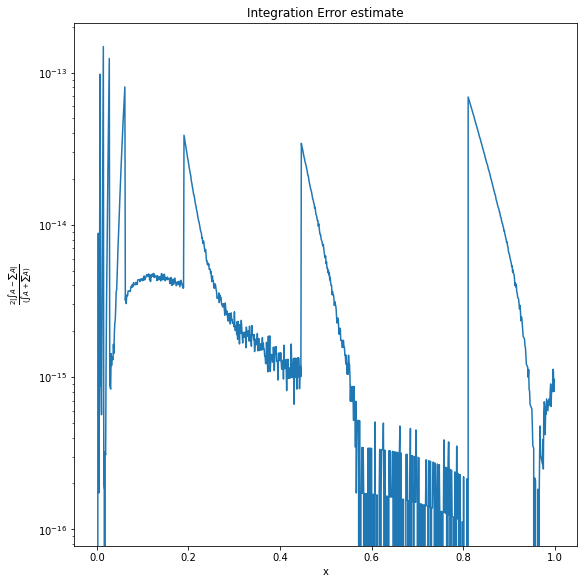

In [ ]:
cross_section_dict = np.load("cross_sections.npy", allow_pickle=True)[()]
cross_section_dict_WW = np.load("cross_sections_WW.npy", allow_pickle=True)[()]

# Testing my numeric integration for accuracy ...
test1 = []
test2 = []

for x in xs:
    test1.append(integrated_A22_IWW(A22_tmin_vector, x, 0.01))
    test2.append(analytic_integrated_A22_V(A22_tmin_vector, x, 0.01))


plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))


plt.plot(xs, 2*  np.abs(np.array(test1) - np.array(test2) ) / (np.array(test1) + np.array(test2) ) )
# plt.plot(xs, np.array(test2) )
plt.yscale("log")
plt.ylabel(r"$\frac{2|\int A- \sum A|}{(\int A+ \sum A)}$")
plt.xlabel("x")
plt.title("Integration Error estimate")

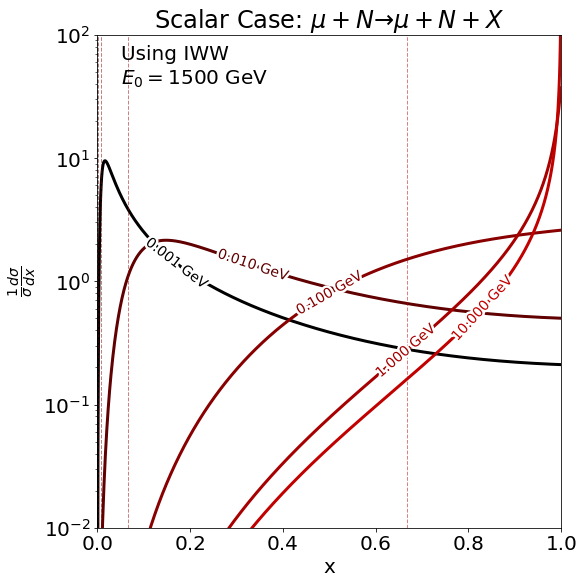

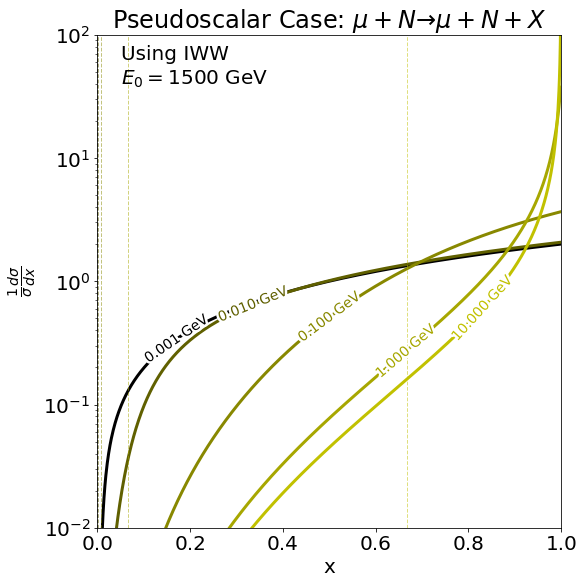

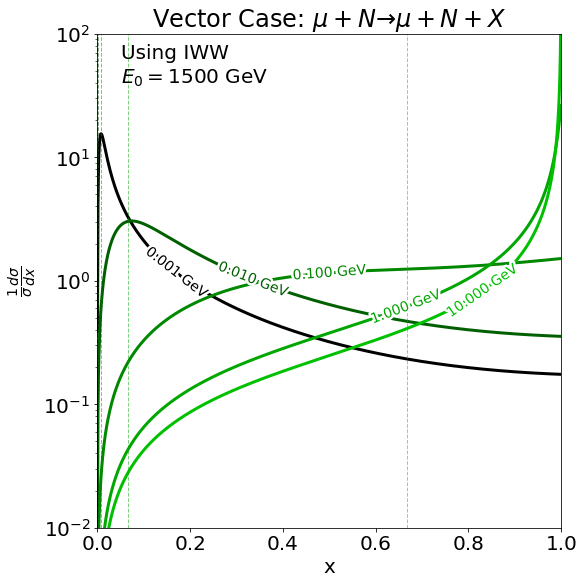

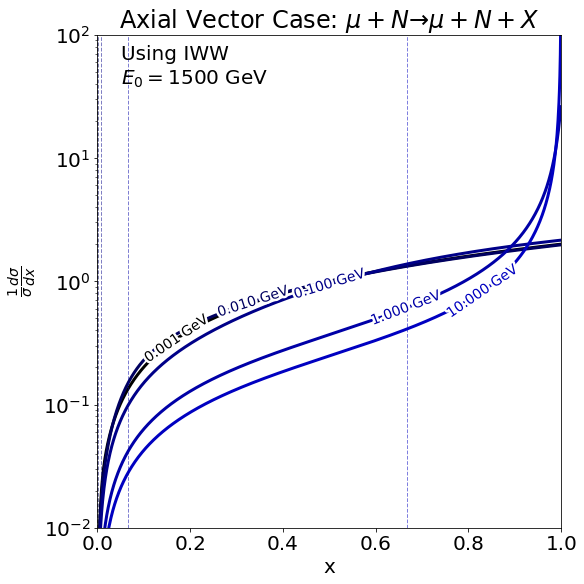

In [ ]:
from rikabtools.plot_utils import cmaps
from labellines import labelLine, labelLines

m_X_indices = [0,1,2,3,4]

for (c,case) in enumerate(cases):

    plt.rcParams.update({'font.size': 20})
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

    for (i, m_X) in enumerate(m_Xs):

        if i in m_X_indices:

            dsigma_dx_normalized = cross_section_dict[case][i] / np.nansum(cross_section_dict[case][i]/ xbins) 
            plt.plot(xs,  dsigma_dx_normalized, label = f"{m_X:.3f} GeV", color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3)

            # WW Version
            dsigma_dx_normalized = cross_section_dict_WW[case][i] / np.nansum(cross_section_dict_WW[case][i]/ xbins) 
            # plt.plot(xs,  dsigma_dx_normalized, color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3, ls = "--", alpha = 0.5)


    
    plt.text(0.05, 1.00 - 0.05*1, r"Using IWW", fontsize = 20, transform = plt.gca().transAxes,)
    # plt.text(0.05, 1.00 - 0.05*1, r"IWW (Solid) and WW (Dashed)", fontsize = 20, transform = plt.gca().transAxes,)
    plt.text(0.05, 1.00 - 0.05*2, r"$E_0 = %d$ GeV" % E_0, fontsize = 20, transform = plt.gca().transAxes,)
    labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)

    for (i, m_X) in enumerate(m_Xs[m_Xs < 10000]):

        if i in m_X_indices:

            x_star = 100 * m_X / E_0 
            plt.axvline(x_star, color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 1, alpha = 0.5, ls = "--")


    plt.yscale("log")
    plt.xlim([0, 1])
    plt.ylim([0.01, 100])
    plt.xlabel("x")
    plt.title(f"{case} Case: " + r"$\mu+N \to \mu+N+X$")
    plt.ylabel(r"$\frac{1}{\sigma}\frac{d\sigma}{dx}$")
    plt.savefig(f"tex/Figures/{case}.pdf", transparent = False)
    # plt.legend(title = f"{case} Mass $m_X$")

/tmp/ipykernel_10783/1094305387.py:15: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xs,  (dsigma_dx_normalized - dsigma_dx_normalized_WW) / dsigma_dx_normalized_WW, color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3, label = f"{m_X} GeV")


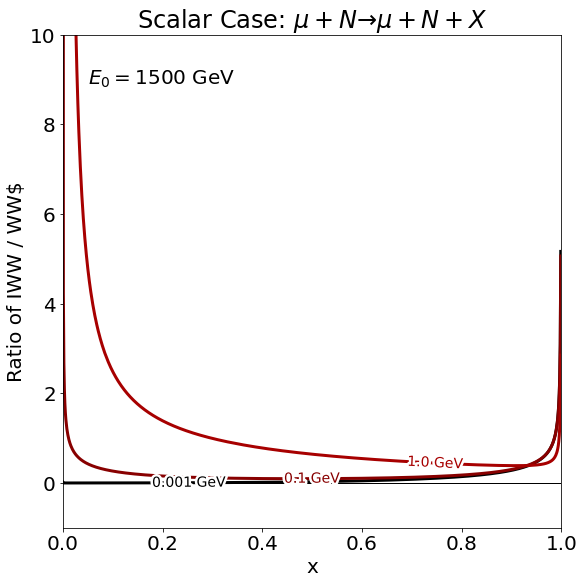

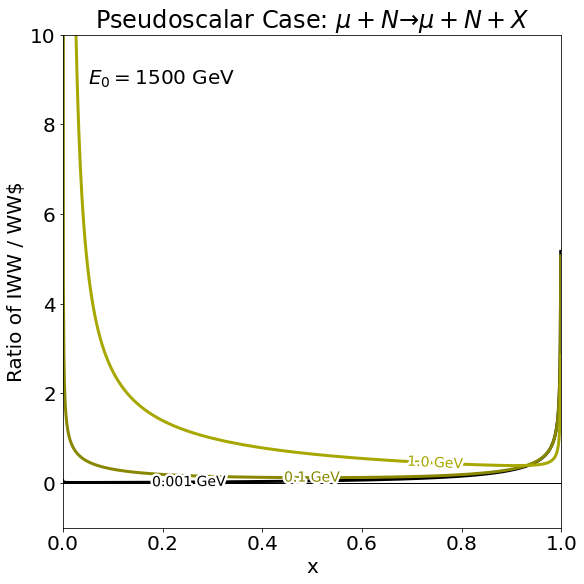

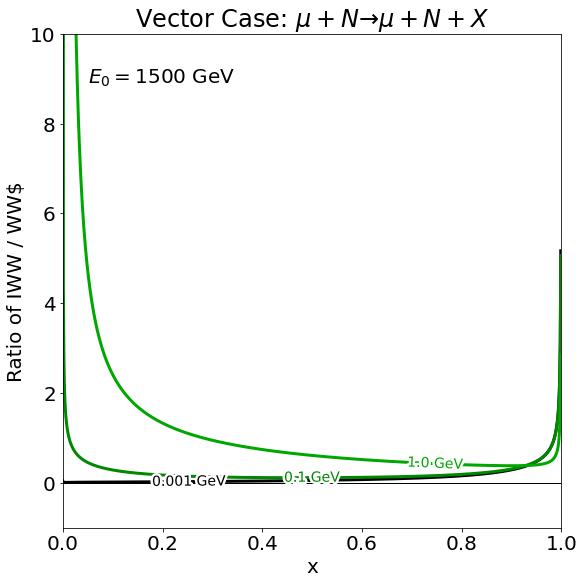

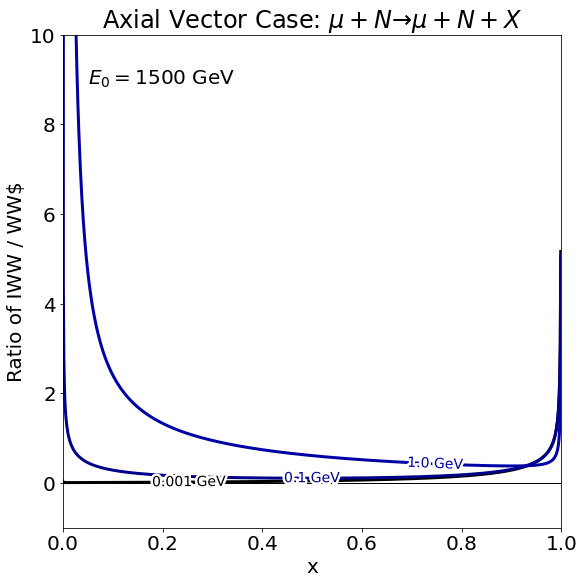

In [ ]:
for (c,case) in enumerate(cases):

    plt.rcParams.update({'font.size': 20})
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

    for (i, m_X) in enumerate(m_Xs[m_Xs < 10000]):

        if i in m_X_indices:

            dsigma_dx_normalized = cross_section_dict[case][i] 
            # plt.plot(xs,  dsigma_dx_normalized, label = f"{m_X:.3f} GeV", color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3)

            # WW Version
            dsigma_dx_normalized_WW = cross_section_dict_WW[case][i] 
            plt.plot(xs,  (dsigma_dx_normalized - dsigma_dx_normalized_WW) / dsigma_dx_normalized_WW, color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3, label = f"{m_X} GeV")


    
    # plt.text(0.05, 1.00 - 0.05*1, r"IWW (Solid) and WW (Dashed)", fontsize = 20, transform = plt.gca().transAxes,)
    plt.text(0.05, 1.00 - 0.05*2, r"$E_0 = %d$ GeV" % E_0, fontsize = 20, transform = plt.gca().transAxes,)
    labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)

    plt.axhline(0, color = "black", lw = 1)


    for (i, m_X) in enumerate(m_Xs[m_Xs < 10000]):

        if i in m_X_indices:

            x_star = 100 * m_X / E_0 


    # plt.yscale("log")
    plt.xlim([0, 1])
    plt.ylim([-1, 10])
    plt.xlabel("x")
    plt.title(f"{case} Case: " + r"$\mu+N \to \mu+N+X$")
    plt.ylabel(r"Ratio of IWW / WW$")
    # plt.savefig(f"tex/Figures/{case}.pdf", transparent = False)
    # plt.legend(title = f"{case} Mass $m_X$")

Scalar 100.0 6.666666666666667
100.0
Pseudoscalar 100.0 6.666666666666667
100.0
Vector 10.0 0.11030731280687174 0.6666666666666666
10.0
Axial Vector 10.0 0.11026184308199266 0.6666666666666666
10.0


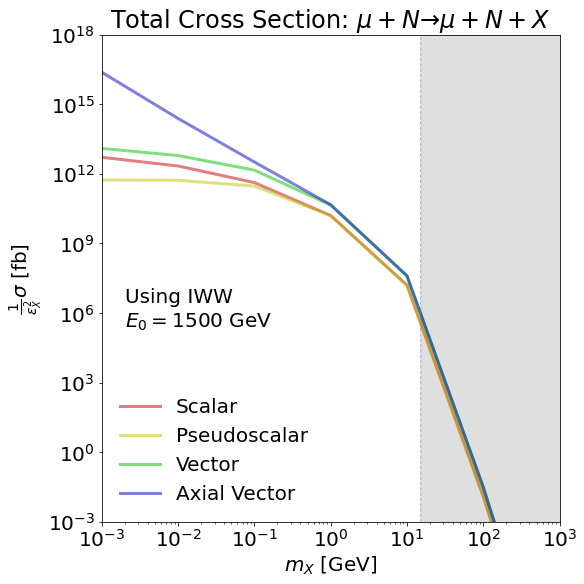

In [ ]:
# Total cross sections

geV2_to_mb = 0.389
mb_to_fb = 1e12

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

for (c,case) in enumerate(cases):


    # Calculate the highest mass for which 95% of cross section has a boost factor > 100
    mass_cross_sections = mb_to_fb * geV2_to_mb * np.array([np.nansum(cross_section_dict[case][i]/ xbins) for (i, m_X) in enumerate(m_Xs[m_Xs < E_0])])
    cumulative_sum = np.array([np.cumsum(cross_section_dict[case][i]/ xbins / mass_cross_sections[i] * (mb_to_fb * geV2_to_mb)) for (i, m_X) in enumerate(m_Xs[m_Xs < E_0])])
    critical_mass = 1e3

    mass_cross_sections_WW = mb_to_fb * geV2_to_mb * np.array([np.nansum(cross_section_dict_WW[case][i]/ xbins) for (i, m_X) in enumerate(m_Xs[m_Xs < E_0])])
    cumulative_sum_WW = np.array([np.cumsum(cross_section_dict_WW[case][i]/ xbins / mass_cross_sections_WW[i] * (mb_to_fb * geV2_to_mb)) for (i, m_X) in enumerate(m_Xs[m_Xs < E_0])])


    for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):

        x_star = 100 * m_X / E_0 
        x_star_index = int(x_star * xbins)

        if x_star_index >= xbins:
            print(case, m_X, x_star)
            critical_mass = m_X
            break

        if cumulative_sum[i][x_star_index] < 1- 0.950:
            pass
        else:
            critical_mass = m_X
            print(case, m_X, cumulative_sum[i][x_star_index], x_star)
            break


        critical_cumulative_sum = cumulative_sum[i][x_star_index]
        pre_critical_mass = m_Xs[i -1]

    plt.plot(m_Xs[m_Xs < E_0], mass_cross_sections, color = cmaps[colors[c]](0.75), lw = 3, label = case, alpha = 0.5)
    # plt.plot(m_Xs[m_Xs < E_0], mass_cross_sections_WW, color = cmaps[colors[c]](0.75), lw = 3, alpha = 0.5, ls = "--")
    print(critical_mass)
    # for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):

    #     dsigma_dx_normalized = cross_section_dict[case][i] / np.nansum(cross_section_dict[case][i]/ xbins) 
    #     plt.plot(xs,  dsigma_dx_normalized, label = f"{m_X} GeV", color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3)

    
    # plt.text(0.05, 1.00 - 0.05*1, r"Using IWW", fontsize = 20, transform = plt.gca().transAxes,)
    # plt.text(0.05, 1.00 - 0.05*2, r"$E_0 = %d$ GeV" % E_0, fontsize = 20, transform = plt.gca().transAxes,)

    # for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):

    #     x_star = 100 * m_X / E_0 
    #     plt.axvline(x_star, color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 1, alpha = 0.5, ls = "--")





ax.fill_between(np.logspace(-3, 3, 500), 1e-12, 1e18, where = np.logspace(-3, 3, 500) > E_0 / 100, color = "grey", alpha = 0.25)
plt.axvline(E_0  / 100, color = "grey", lw = 1, alpha = 0.5, ls = "--")


plt.yscale("log")
plt.xscale("log")

# labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)


# plt.xlim([0, 1])
plt.ylim([1e-3, 1e18])
plt.xlim([1e-3, 1e3])
plt.xlabel("$m_X$ [GeV]")
plt.title(f"Total Cross Section: " + r"$\mu+N \to \mu+N+X$")
plt.ylabel(r"$\frac{1}{\epsilon_X^2}\sigma$ [fb]")

plt.text(0.05, 0.5 - 0.05*1, r"Using IWW", fontsize = 20, transform = plt.gca().transAxes,)
plt.text(0.05, 0.5 - 0.05*2, r"$E_0 = %d$ GeV" % E_0, fontsize = 20, transform = plt.gca().transAxes,)
# labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)


plt.legend(frameon = False)


plt.savefig(f"tex/Figures/Integrated_Cross_Sections.pdf", transparent = False)
# plt.legend(title = f"{case} Mass $m_X$")

In [ ]:
# from rikabtools.plot_utils import cmaps
# from labellines import labelLine, labelLines



# for (c,case) in enumerate(cases):

#     plt.rcParams.update({'font.size': 20})
#     fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

#     for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):
        

#         dsigma_dx_normalized = mb_to_fb * geV2_to_mb * cross_section_dict[case][i] 
#         plt.plot(xs,  dsigma_dx_normalized, label = f"{m_X} GeV", color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3)

    
#     plt.text(0.05, .5 - 0.05*1, r"Using IWW", fontsize = 20, transform = plt.gca().transAxes,)
#     plt.text(0.05, .5 - 0.05*2, r"$E_0 = %d$ GeV" % E_0, fontsize = 20, transform = plt.gca().transAxes,)
#     labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)

#     for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):

#         x_star = 100 * m_X / E_0 
#         plt.axvline(x_star, color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 1, alpha = 0.5, ls = "--")


#     plt.yscale("log")
#     plt.xlim([0, 1])
#     plt.ylim([1e-12, 1e18])
#     plt.xlabel("x")
#     plt.title(f"{case} Case: " + r"$\mu+N \to \mu+N+A$")
#     plt.ylabel(r"$\frac{1}{\epsilon^2}\frac{d\sigma}{dx}$ [fb]")
#     # plt.savefig(f"{case}.")
#     # plt.legend(title = f"{case} Mass $m_X$")

6074.773572992815


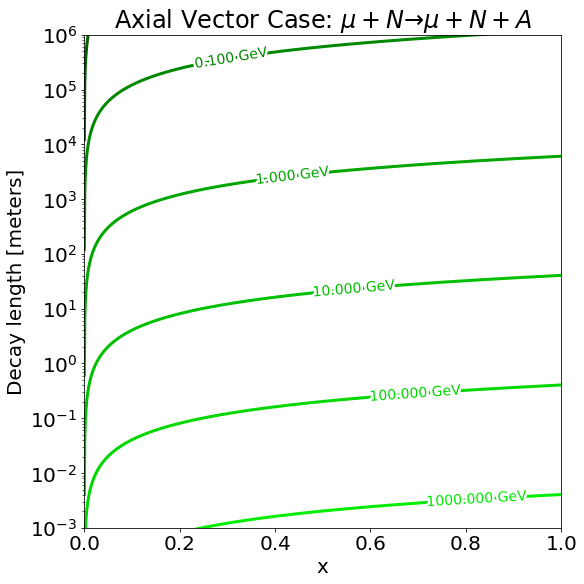

In [ ]:
def scalar_decay_width(m_X, epsilon, m_l):

    if m_X <= 2  *m_l:
        return 0

    prefactor = epsilon**2 * alpha_EM / 2
    kinematic_factor = m_X * np.sqrt(1 - 4 * m_l**2 / m_X**2)**3
    return prefactor * kinematic_factor


def vector_decay_width(m_X, epsilon, m_l):

    if m_X <= 2  *m_l:
        return 0

    prefactor = epsilon**2 * alpha_EM / 3
    kinematic_factor = m_X * (1 + 2*m_l**2 / m_X**2) * np.sqrt(1 - 4 * m_l**2 / m_X**2)
    return prefactor * kinematic_factor

def decay_length(decay_width, x, m_X, epsilon):

    hbarc = .197 # GeV fm
    gamma = (x * E_0) / m_X


    total_decay_width = decay_width(m_X, epsilon, m_e) + decay_width(m_X, epsilon, m_mu) + decay_width(m_X, epsilon, 1.776)
    return 1e-15 * hbarc * gamma / total_decay_width



plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))


for (i, m_X) in enumerate(m_Xs[m_Xs < E_0]):

    if m_X > 2 * m_e:
        c = 2
        epsilon_0 = 1e-7
        decay_lengths = []
        for x in xs:
            decay_lengths.append(decay_length(vector_decay_width, x, m_X, epsilon_0))
        plt.plot(xs,  decay_lengths, label = f"{m_X:.3f} GeV", color = cmaps[colors[c]](np.sqrt(i / len(m_Xs[m_Xs < E_0]))), lw = 3)


plt.yscale("log")
plt.xlim([0, 1])
plt.ylim([1e-3, 1e6])
plt.xlabel("x")
plt.title(f"{case} Case: " + r"$\mu+N \to \mu+N+A$")
plt.ylabel(r"Decay length [meters]")

labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)


print(decay_length(vector_decay_width, x = 1.0, m_X =  1.0, epsilon = 1e-7))



# Notes
* Things go horribly wrong (for the scalar case) when the A mass is much less than the lepton mass

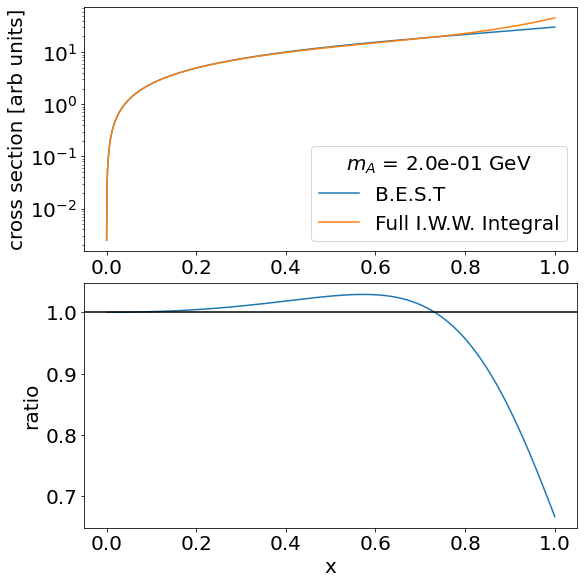

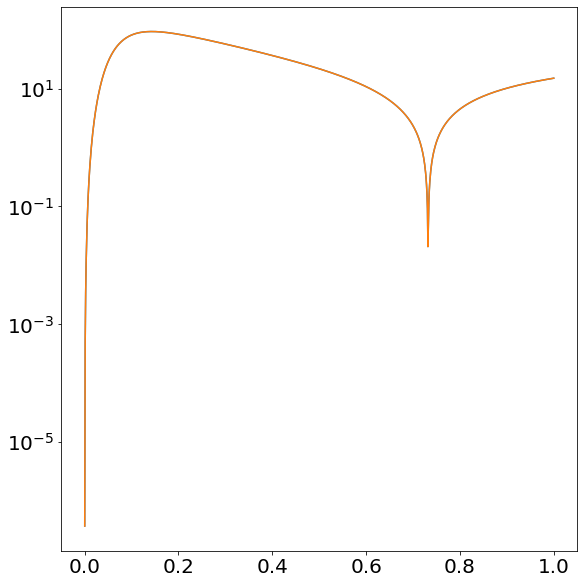

In [ ]:
# Thing that is sus in BEST

# After checking: it actually was sus, approximation is bad for m_X << m_mu

def best_2nd_term(x, m_X):

    U = m_X**2 * (1-x) / x + m_mu**2 * x
    return  (1 - x + x**2 / 2) / U  - (x**2 / U / 6)

def integrated_2nd_term(x, m_X):

    u_max = -m_X**2 * (1-x) / x - m_mu**2 * x

    term2 = -(m_X**2 + 2 * m_mu**2) / u_max**3 / 3
    term3 = (u_max*x * 3 / 2) + m_X**2 * (1-x) + m_mu**2 * x**2 

    return (1 - x + x**2 / 2) / (-1 * u_max) + (term2 * term3 * (1-x))

def error(x, m_X):

    aa = best_2nd_term(x, m_X)
    bb = integrated_2nd_term(x, m_X)

    return  np.abs(aa-bb) 


def difference(x, m_X):

    U = m_X**2 * (1-x) / x + m_mu**2 * x
    return m_mu**2 *(  x**3  - 2 * x * (1-x)) / U**2 / 6


plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(8, 8))
axes[0].plot(xs, np.abs(best_2nd_term(xs, 0.201)), label = "B.E.S.T")
axes[0].plot(xs, np.abs(integrated_2nd_term(xs, 0.201)), label = "Full I.W.W. Integral")
axes[0].set_yscale('log')
axes[0].legend(title = r"$m_{A}$ = %.1e GeV" % 0.201)
axes[0].set_ylabel("cross section [arb units]")
# plt.plot(xs, np.abs(integrated_2nd_term(xs, 0.01)) - np.abs(difference(x, m_X)))

axes[1].plot(xs, np.abs(best_2nd_term(xs, 0.201)) / np.abs(integrated_2nd_term(xs, 0.201)))
axes[1].set_ylabel("ratio")
axes[1].axhline(1.0, color = "black")


plt.xlabel("x")


plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))
plt.plot(xs, error(xs, 0.01))
plt.plot(xs, np.abs(difference(xs, 0.01)))
plt.yscale('log')